In [5]:
# Step 1: Load CSV with error handling
try:
    df = pd.read_csv("owid-covid-data.csv")  # Replace with the correct path if needed
    print("✅ File loaded successfully!\n")
except FileNotFoundError:
    print("❌ Error: The file was not found.")
    exit()
except pd.errors.EmptyDataError:
    print("❌ Error: The file is empty.")
    exit()
except pd.errors.ParserError:
    print("❌ Error: There was an error parsing the file.")
    exit()

✅ File loaded successfully!



In [ ]:
#Importing all libraries at once
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns


In [ ]:
2️⃣ Data Loading & Exploration

In [6]:

# Load the covid dataset from the local CSV file
df = pd.read_csv('owid-covid-data.csv')

#check columns
print (df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
# Show the first 5 rows of the dataset
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [8]:
# Check for missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64


In [10]:
#Filtering to key columnss 
training_df = df[[
    "location", "date", "total_cases", "new_cases", "total_deaths",
    "new_deaths", "total_vaccinations", "people_vaccinated",
    "population", "gdp_per_capita"
]]

print(training_df.head())

      location        date  total_cases  new_cases  total_deaths  new_deaths  \
0  Afghanistan  2020-01-05          0.0        0.0           0.0         0.0   
1  Afghanistan  2020-01-06          0.0        0.0           0.0         0.0   
2  Afghanistan  2020-01-07          0.0        0.0           0.0         0.0   
3  Afghanistan  2020-01-08          0.0        0.0           0.0         0.0   
4  Afghanistan  2020-01-09          0.0        0.0           0.0         0.0   

   total_vaccinations  people_vaccinated  population  gdp_per_capita  
0                 NaN                NaN    41128772        1803.987  
1                 NaN                NaN    41128772        1803.987  
2                 NaN                NaN    41128772        1803.987  
3                 NaN                NaN    41128772        1803.987  
4                 NaN                NaN    41128772        1803.987  


In [11]:
# Checking unique names for countries under column Location
country_names = training_df['location'].unique()

# Convert to a list
country_list = list(country_names)

# Print all country names
print(country_list)


['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe', 'European Union (27)', 'Faroe Islands', 'Fal

In [ ]:
3️⃣ Data Cleaning

In [12]:
# Filter rows to countries of interest
filtered_df = training_df[training_df['location'].isin(['Kenya', 'Italy', 'China', 'United States', 'Canada'])]

# Show the first few rows
print(filtered_df.head())

      location        date  total_cases  new_cases  total_deaths  new_deaths  \
63626   Canada  2020-01-05          0.0        0.0           0.0         0.0   
63627   Canada  2020-01-06          0.0        0.0           0.0         0.0   
63628   Canada  2020-01-07          0.0        0.0           0.0         0.0   
63629   Canada  2020-01-08          0.0        0.0           0.0         0.0   
63630   Canada  2020-01-09          0.0        0.0           0.0         0.0   

       total_vaccinations  people_vaccinated  population  gdp_per_capita  
63626                 NaN                NaN    38454328       44017.591  
63627                 NaN                NaN    38454328       44017.591  
63628                 NaN                NaN    38454328       44017.591  
63629                 NaN                NaN    38454328       44017.591  
63630                 NaN                NaN    38454328       44017.591  


In [13]:
# Drop rows where date columns or other critical columns have missing values
cleaned_df = filtered_df.dropna(subset=['date', 'location', 'new_cases'], how='any')

# Check how many rows were removed
print(f"Original filtered data shape: {filtered_df.shape}")
print(f"After dropping missing values: {cleaned_df.shape}")
print(f"Number of rows removed: {filtered_df.shape[0] - cleaned_df.shape[0]}")

# Verify there are no missing values in critical columns
print("\nMissing values in critical columns:")
print(cleaned_df[['date', 'location', 'new_cases']].isna().sum())

Original filtered data shape: (8373, 10)
After dropping missing values: (7928, 10)
Number of rows removed: 445

Missing values in critical columns:
date         0
location     0
new_cases    0
dtype: int64


In [19]:
# Convert the 'date' column to datetime format and making it explicit using .loc
cleaned_df.loc[:, 'date'] = pd.to_datetime(cleaned_df['date'])

print(cleaned_df.dtypes)

location                      object
date                  datetime64[ns]
total_cases                  float64
new_cases                    float64
total_deaths                 float64
new_deaths                   float64
total_vaccinations           float64
people_vaccinated            float64
population                     int64
gdp_per_capita               float64
dtype: object


In [20]:
# Check which numeric columns have missing values
missing_counts = cleaned_df.select_dtypes(include=['number']).isna().sum()
print("Missing values in numeric columns:", missing_counts[missing_counts > 0].to_dict())

# Option 1: Fill missing values with column means
cleaned_df = cleaned_df.fillna({col: cleaned_df[col].mean() for col in cleaned_df.select_dtypes(include=['number']).columns})

# Check which numeric columns have missing values
missing_counts = cleaned_df.select_dtypes(include=['number']).isna().sum()
print("Missing values in numeric columns:", missing_counts[missing_counts > 0].to_dict())

# Filling missing values with column means
cleaned_df = cleaned_df.fillna({col: cleaned_df[col].mean() for col in cleaned_df.select_dtypes(include=['number']).columns})

# Verify no missing values remain in numeric columns
print("Remaining missing numeric values:", cleaned_df.select_dtypes(include=['number']).isna().sum().sum())


Missing values in numeric columns: {'new_deaths': 2, 'total_vaccinations': 3778, 'people_vaccinated': 5026}
Missing values in numeric columns: {}
Remaining missing numeric values: 0


In [ ]:
4️⃣ Exploratory Data Analysis (EDA)

In [ ]:
Plotting total cases over time for selected countries.

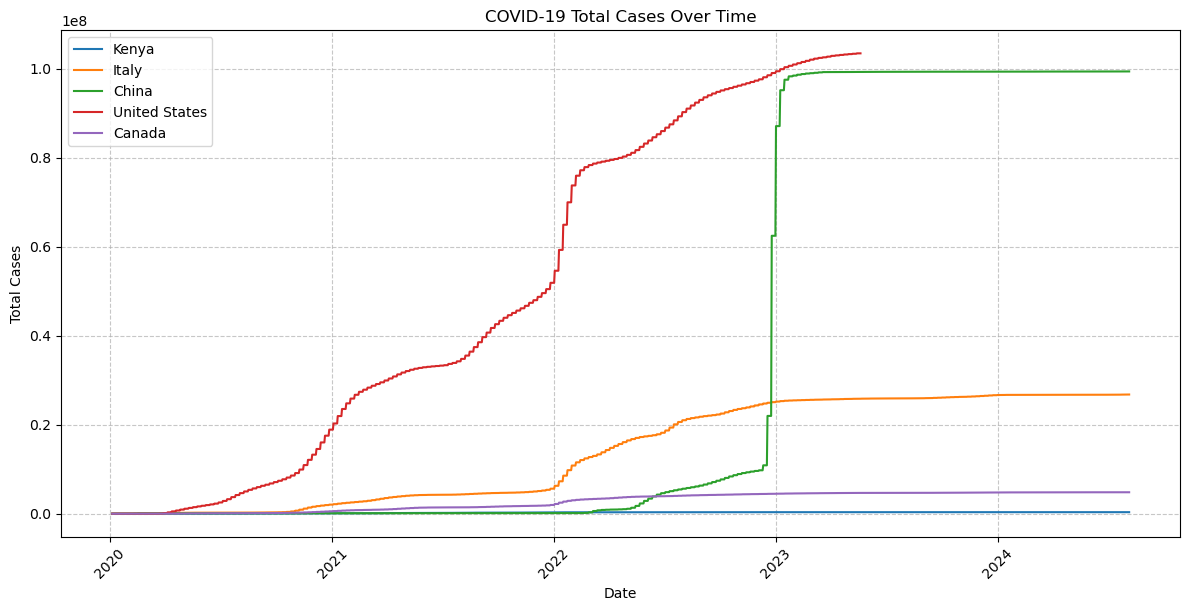

In [22]:
# Select countries and plot total cases over time
countries = ['Kenya', 'Italy', 'China', 'United States', 'Canada']
selected_data = cleaned_df[cleaned_df['location'].isin(countries)]

# Create the plot
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = selected_data[selected_data['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('COVID-19 Total Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
Plotting total deaths over time.

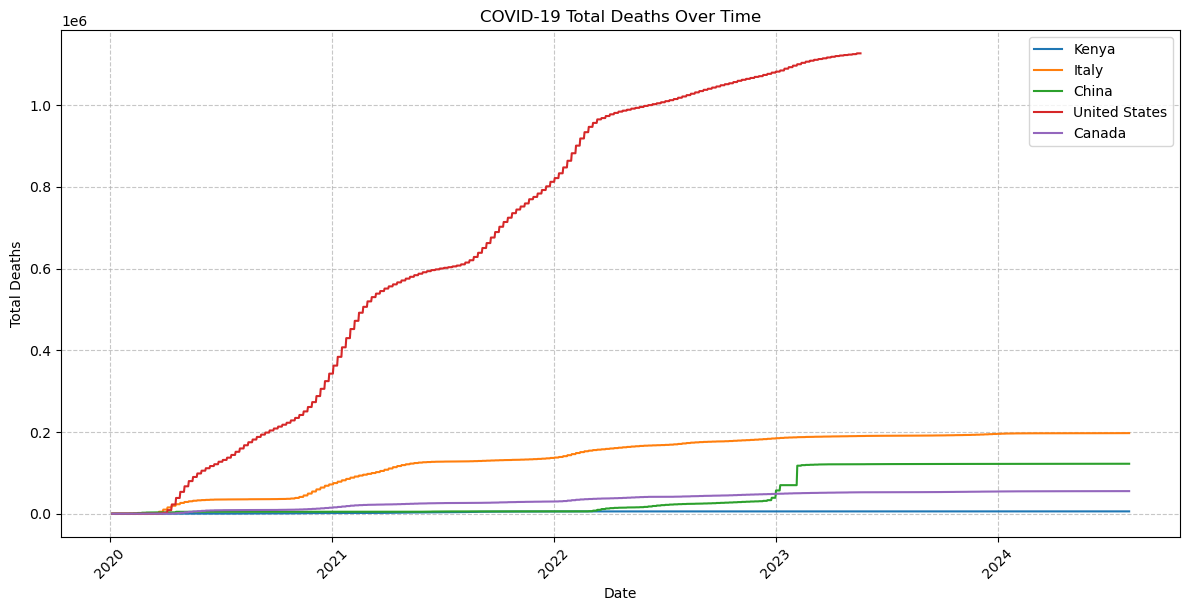

In [23]:

# Create the plot
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = selected_data[selected_data['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('COVID-19 Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
Comparing daily new cases between countries.

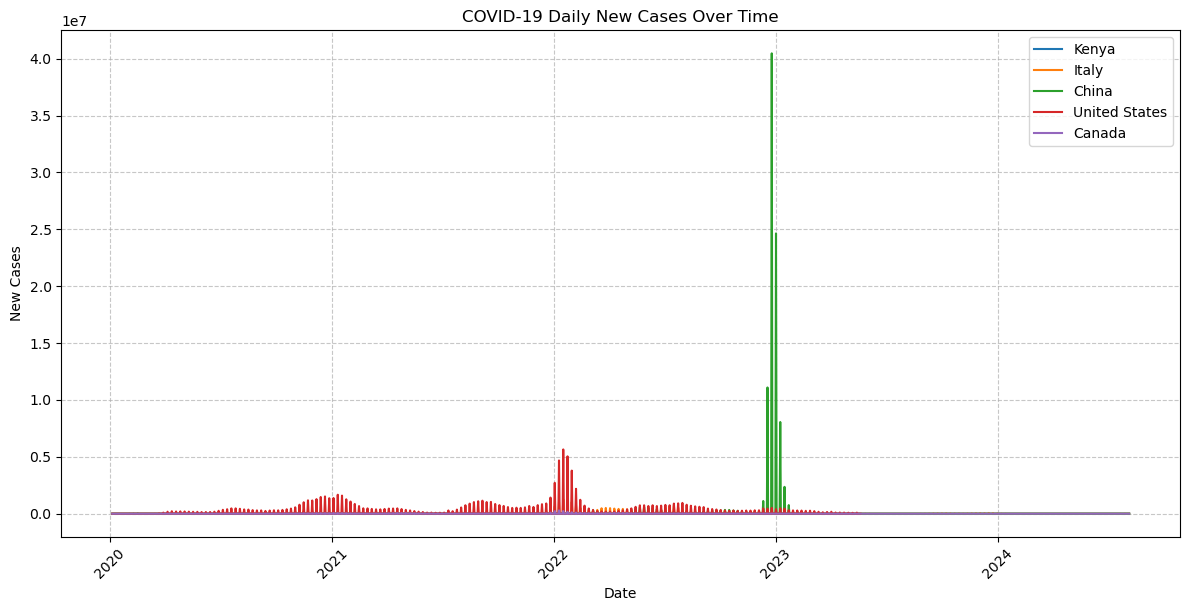

In [24]:

# Create the plot
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = selected_data[selected_data['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('COVID-19 Daily New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
Calculating the death rate: total_deaths / total_cases.

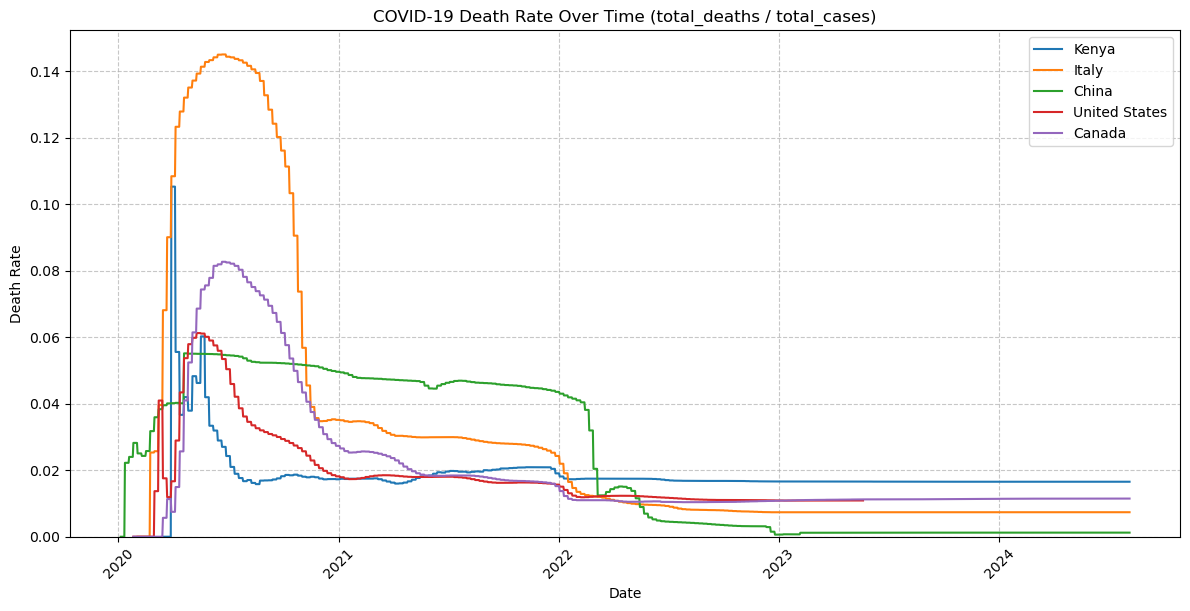

Latest Death Rates:
Kenya: 0.0165 (2024-08-04)
Italy: 0.0074 (2024-08-04)
China: 0.0012 (2024-08-04)
United States: 0.0109 (2023-05-20)
Canada: 0.0115 (2024-08-04)


In [27]:

# Calculate death rate (total_deaths / total_cases)
cleaned_df['death_rate'] = cleaned_df['total_deaths'] / cleaned_df['total_cases']

# Select countries and plot death rate over time
countries = ['Kenya', 'Italy', 'China', 'United States', 'Canada']
selected_data = cleaned_df[cleaned_df['location'].isin(countries)]

# Create the plot
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = selected_data[selected_data['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time (total_deaths / total_cases)')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.ylim(bottom=0)  # Start y-axis at 0
plt.show()

# Print the latest death rate for each country
print("Latest Death Rates:")
for country in countries:
    country_data = selected_data[selected_data['location'] == country]
    if not country_data.empty:
        latest = country_data.sort_values('date').iloc[-1]
        print(f"{country}: {latest['death_rate']:.4f} ({latest['date'].strftime('%Y-%m-%d')})")

In [ ]:
Line charts for (cases & deaths over time)

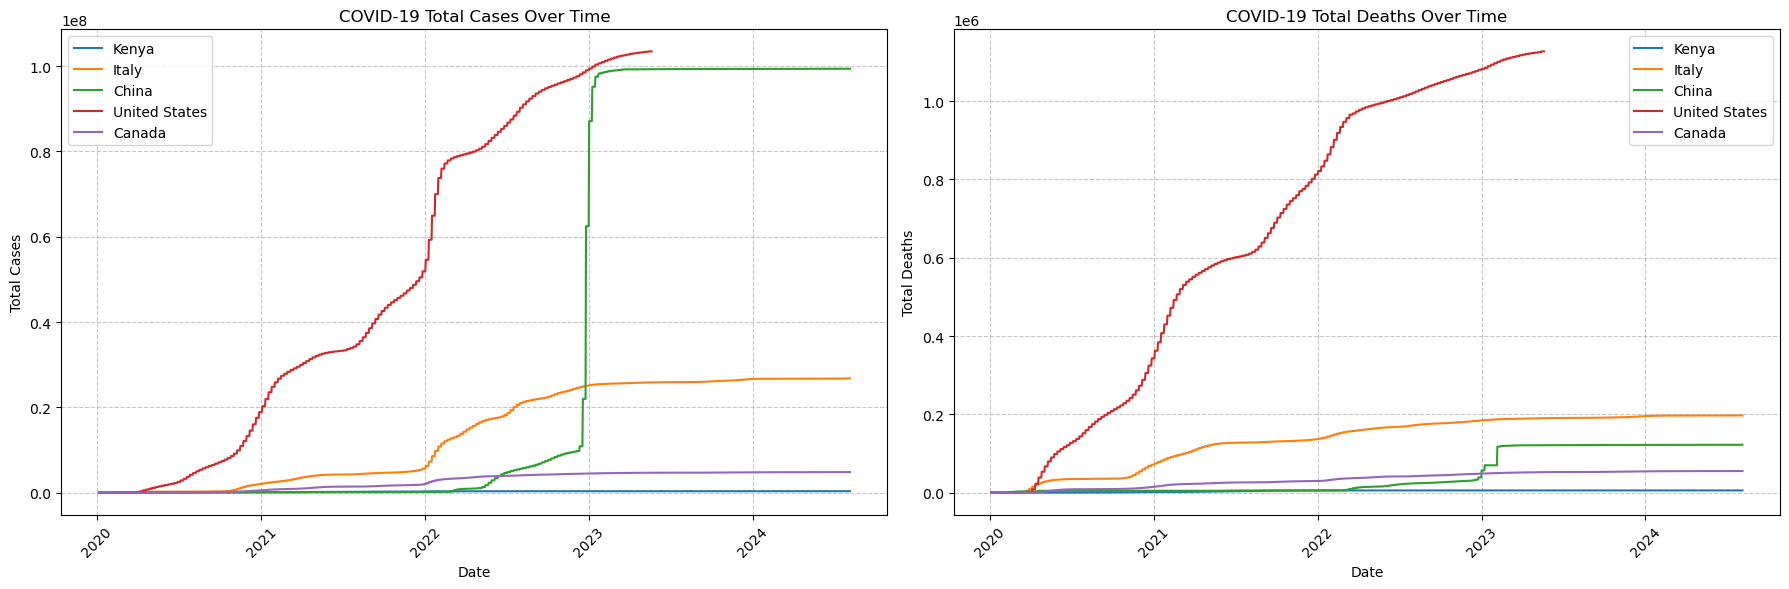

In [28]:

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Total Cases Over Time
for country in countries:
    country_data = selected_data[selected_data['location'] == country]
    ax1.plot(country_data['date'], country_data['total_cases'], label=country)

ax1.set_title('COVID-19 Total Cases Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Total Deaths Over Time
for country in countries:
    country_data = selected_data[selected_data['location'] == country]
    ax2.plot(country_data['date'], country_data['total_deaths'], label=country)

ax2.set_title('COVID-19 Total Deaths Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Deaths')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
Bar charts (top countries by total cases)

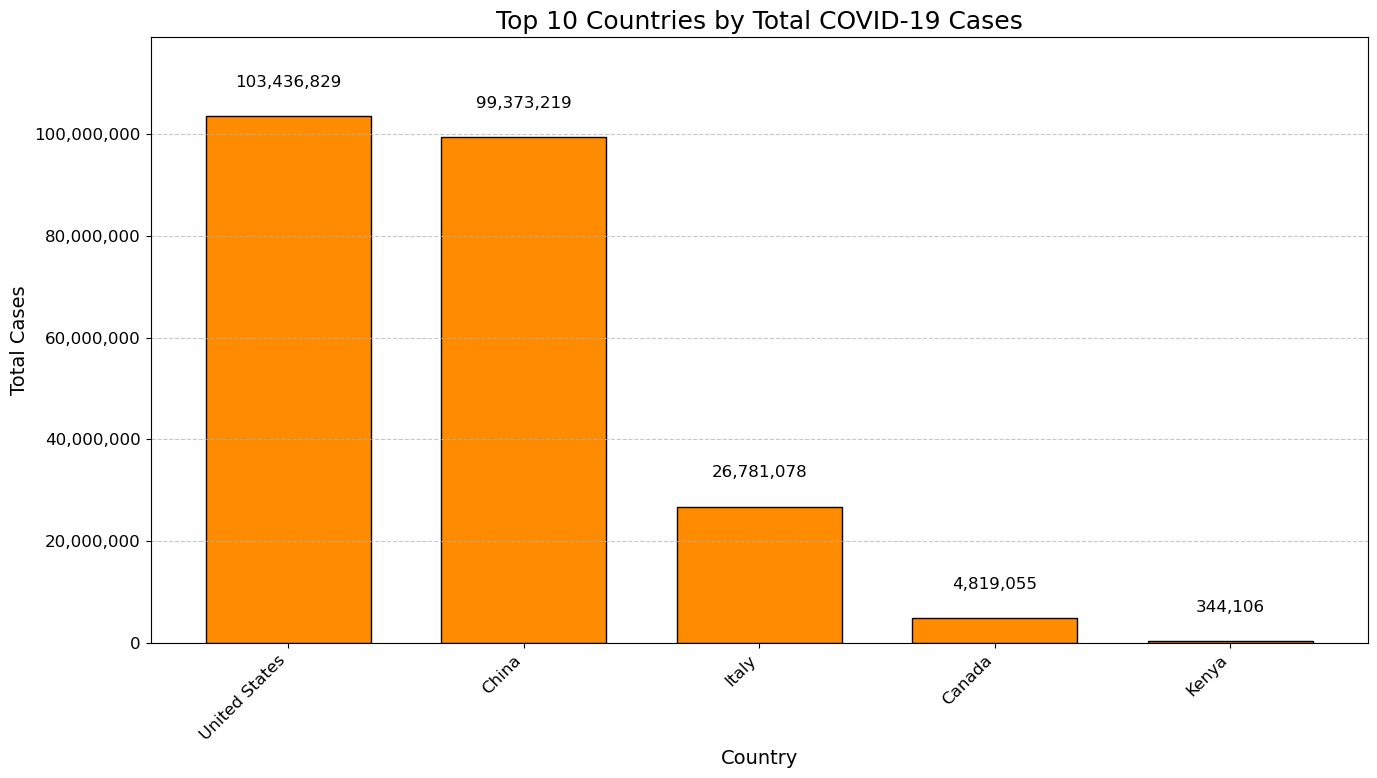

In [33]:

# Get the latest data for each country
latest_data = cleaned_df.sort_values('date').groupby('location').last().reset_index()

# Sort by total cases and get the top 10 countries
top_countries = latest_data.sort_values('total_cases', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(
    top_countries['location'], 
    top_countries['total_cases'],
    color='darkorange',
    edgecolor='black',
    width=0.7
)

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height + 0.05 * max(top_countries['total_cases']),
        f'{int(height):,}',  # Format with commas for thousands
        ha='center', 
        va='bottom',
        fontsize=12
    )

# Customize the chart
plt.title('Top 10 Countries by Total COVID-19 Cases', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis with comma separators for thousands
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Add some padding at the top for the labels
plt.ylim(0, max(top_countries['total_cases']) * 1.15)

plt.tight_layout()
plt.show()

In [ ]:
Heatmaps

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


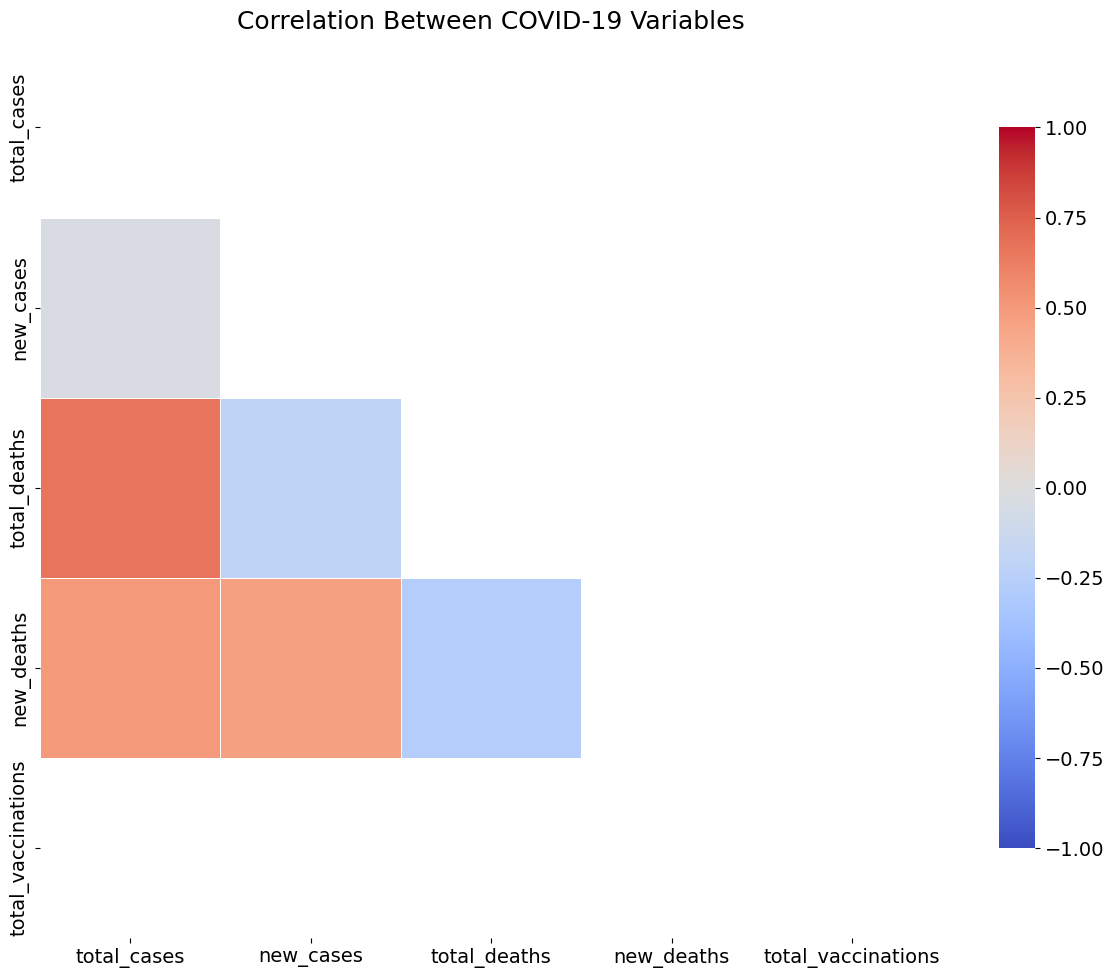

Strongest positive correlations:
total_cases and total_deaths: 0.670
total_cases and new_deaths: 0.499
total_cases and new_cases: -0.036
total_cases and total_vaccinations: nan
new_cases and new_deaths: 0.467


In [34]:
# Select numeric columns for correlation analysis
numeric_cols = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 
                'reproduction_rate', 'icu_patients', 'hosp_patients',
                'total_tests', 'new_tests', 'positive_rate', 'total_vaccinations']

# Filter columns that actually exist in your dataset
available_cols = [col for col in numeric_cols if col in cleaned_df.columns]

# Calculate correlation matrix
# First get the latest data for each country to avoid time-series correlations
latest_data = cleaned_df.sort_values('date').groupby('location').last().reset_index()
correlation_matrix = latest_data[available_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap with seaborn
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True,           # Show correlation values
            fmt=".2f",            # Format as 2 decimal places
            cmap="coolwarm",      # Red-blue color map
            vmin=-1, vmax=1,      # Set limits for correlation values
            linewidths=0.5,       # Width of cell borders
            cbar_kws={"shrink": .8})

plt.title('Correlation Between COVID-19 Variables', fontsize=18)
plt.tight_layout()
plt.show()

# Print the strongest correlations
print("Strongest positive correlations:")
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], 
                          correlation_matrix.iloc[i, j]))

# Sort by absolute correlation value
corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

# Print top 5 strongest correlations
for var1, var2, corr in corr_pairs[:5]:
    print(f"{var1} and {var2}: {corr:.3f}")

In [ ]:
5️⃣ Visualizing Vaccination Progress

In [ ]:
Ploting cumulative vaccinations over time for selected countries.

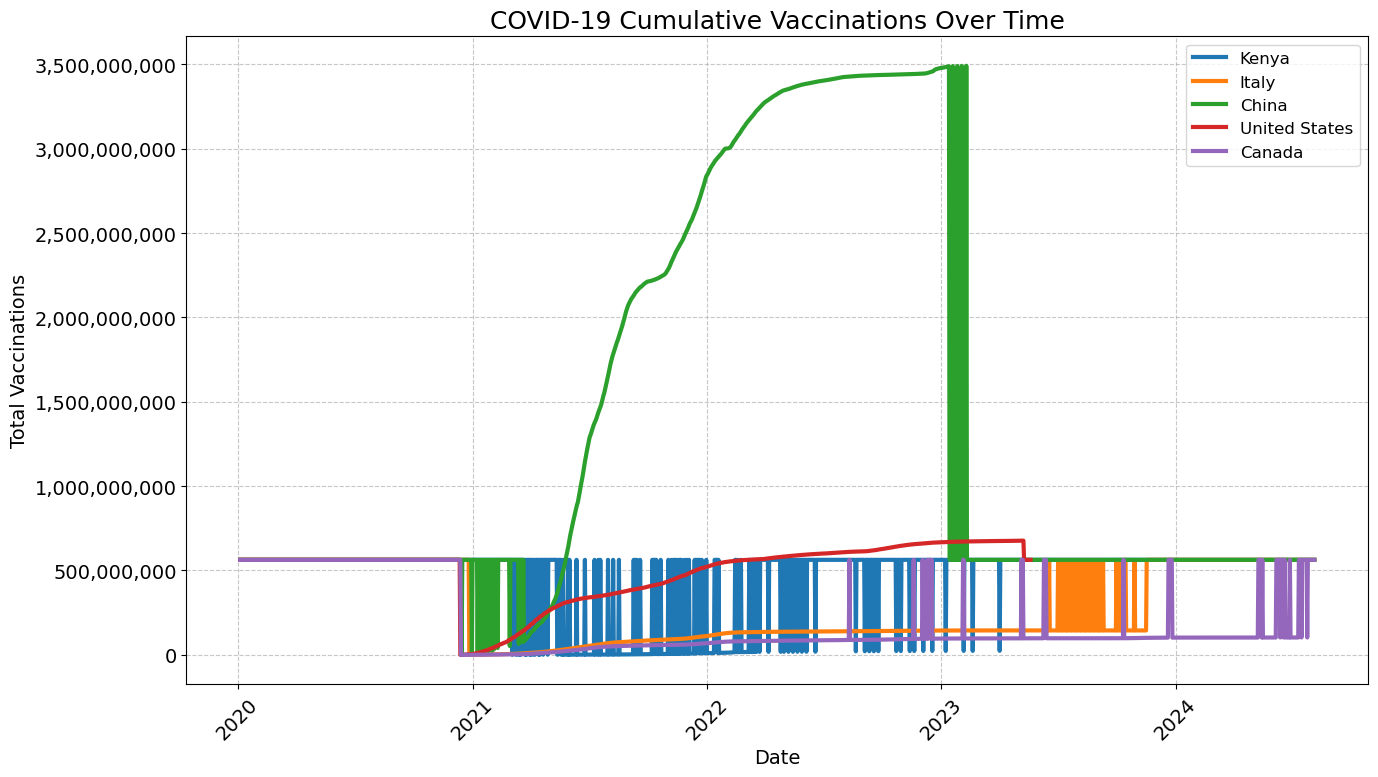

In [35]:
# Check if vaccination data exists
if 'total_vaccinations' not in cleaned_df.columns:
    print("Warning: 'total_vaccinations' column not found in the dataset.")
    # Try to find alternative vaccination columns
    vax_columns = [col for col in cleaned_df.columns if 'vaccin' in col.lower()]
    if vax_columns:
        print(f"Available vaccination-related columns: {vax_columns}")
        vax_column = vax_columns[0]  # Use the first available vaccination column
    else:
        print("No vaccination-related columns found.")
        vax_column = None
else:
    vax_column = 'total_vaccinations'

# Create the plot if vaccination data is available
if vax_column:
    plt.figure(figsize=(14, 8))
    
    for country in countries:
        country_data = selected_data[selected_data['location'] == country]
        # Sort by date and remove rows with missing vaccination data
        country_data = country_data.sort_values('date')
        country_data = country_data.dropna(subset=[vax_column])
        
        if not country_data.empty:
            plt.plot(country_data['date'], country_data[vax_column], 
                     linewidth=3, marker='', label=country)
        else:
            print(f"No vaccination data available for {country}")
    
    plt.title(f'COVID-19 Cumulative Vaccinations Over Time', fontsize=18)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Total Vaccinations', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.xticks(rotation=45)
    
    # Format y-axis with comma separators for thousands
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    
    plt.tight_layout()
    plt.show()

In [ ]:
Comparing % vaccinated population.

Calculating vaccination percentage from people_vaccinated and population...


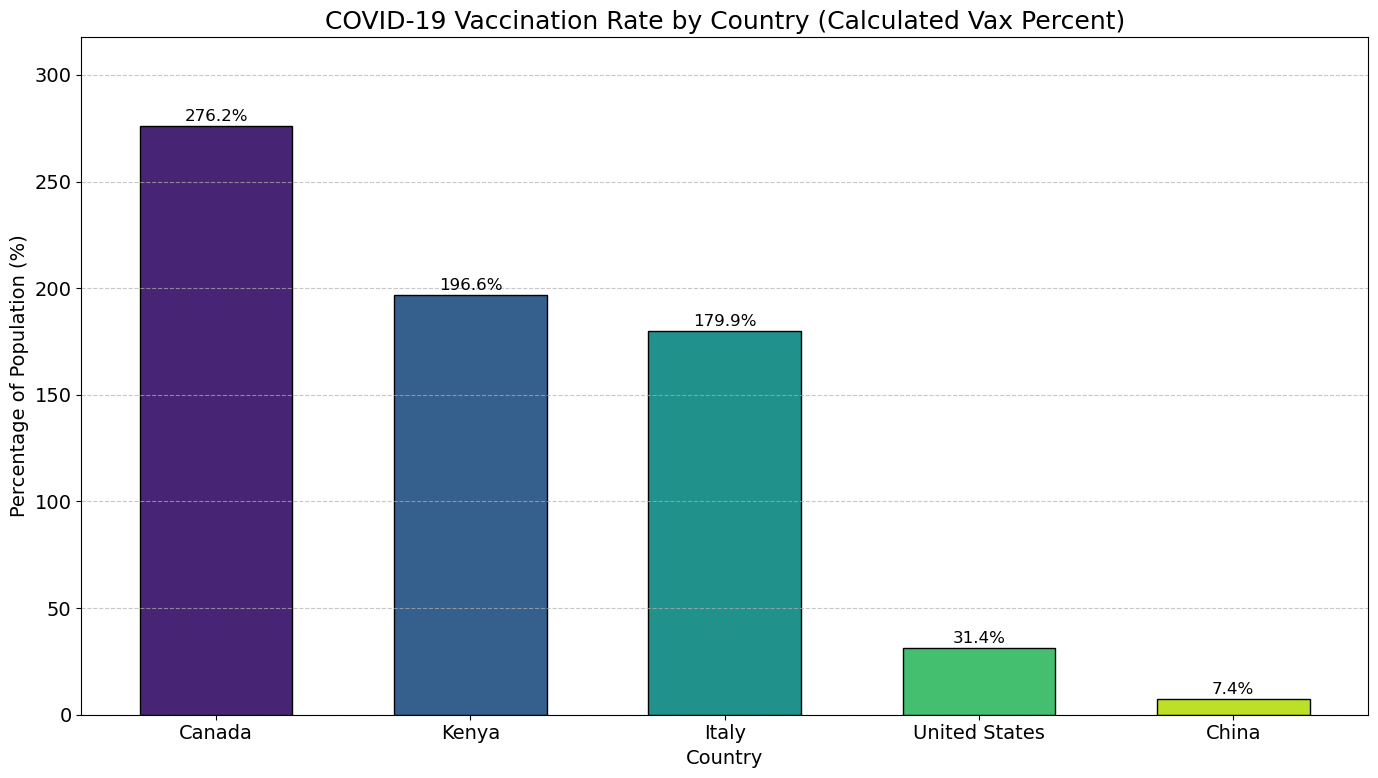

In [36]:

# Check for vaccination percentage columns
possible_columns = ['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 
                   'total_vaccinations_per_hundred']

# Find the first available vaccination percentage column
vax_percent_col = None
for col in possible_columns:
    if col in cleaned_df.columns:
        vax_percent_col = col
        break

# If no percentage column is found, try to calculate it
if vax_percent_col is None:
    if 'people_vaccinated' in cleaned_df.columns and 'population' in cleaned_df.columns:
        print("Calculating vaccination percentage from people_vaccinated and population...")
        cleaned_df['calculated_vax_percent'] = (cleaned_df['people_vaccinated'] / cleaned_df['population']) * 100
        vax_percent_col = 'calculated_vax_percent'
    elif 'total_vaccinations' in cleaned_df.columns and 'population' in cleaned_df.columns:
        print("Calculating approximate vaccination percentage from total_vaccinations and population...")
        cleaned_df['calculated_vax_percent'] = (cleaned_df['total_vaccinations'] / cleaned_df['population']) * 100
        vax_percent_col = 'calculated_vax_percent'
    else:
        print("Error: No vaccination percentage data available and cannot calculate it.")
        vax_percent_col = None

# Create the plot if vaccination percentage data is available
if vax_percent_col:
    # Get the latest data for each country
    latest_data = cleaned_df.sort_values('date').groupby('location').last().reset_index()
    
    # Filter for selected countries
    country_data = latest_data[latest_data['location'].isin(countries)]
    
    # Sort by vaccination percentage
    country_data = country_data.sort_values(vax_percent_col, ascending=False)
    
    # Create the bar chart
    plt.figure(figsize=(14, 8))
    
    # Create bars with a colormap
    bars = plt.bar(
        country_data['location'], 
        country_data[vax_percent_col],
        color=plt.cm.viridis(np.linspace(0.1, 0.9, len(country_data))),
        edgecolor='black',
        width=0.6
    )
    
    # Add data labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):  # Check if the value is not NaN
            plt.text(
                bar.get_x() + bar.get_width()/2.,
                height + 1,  # Position slightly above the bar
                f'{height:.1f}%',  # Format with 1 decimal place
                ha='center', 
                va='bottom',
                fontsize=12
            )
    
    # Customize the chart
    plt.title(f'COVID-19 Vaccination Rate by Country ({vax_percent_col.replace("_", " ").title()})', 
              fontsize=18)
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Percentage of Population (%)', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, max(country_data[vax_percent_col].fillna(0)) * 1.15)  # Add space for labels
    
    plt.tight_layout()
    plt.show()
else:
    print("Cannot create plot: No vaccination percentage data available")

In [ ]:
Pie charts for vaccinated vs. unvaccinated.

Calculating vaccination percentage from people_vaccinated and population...


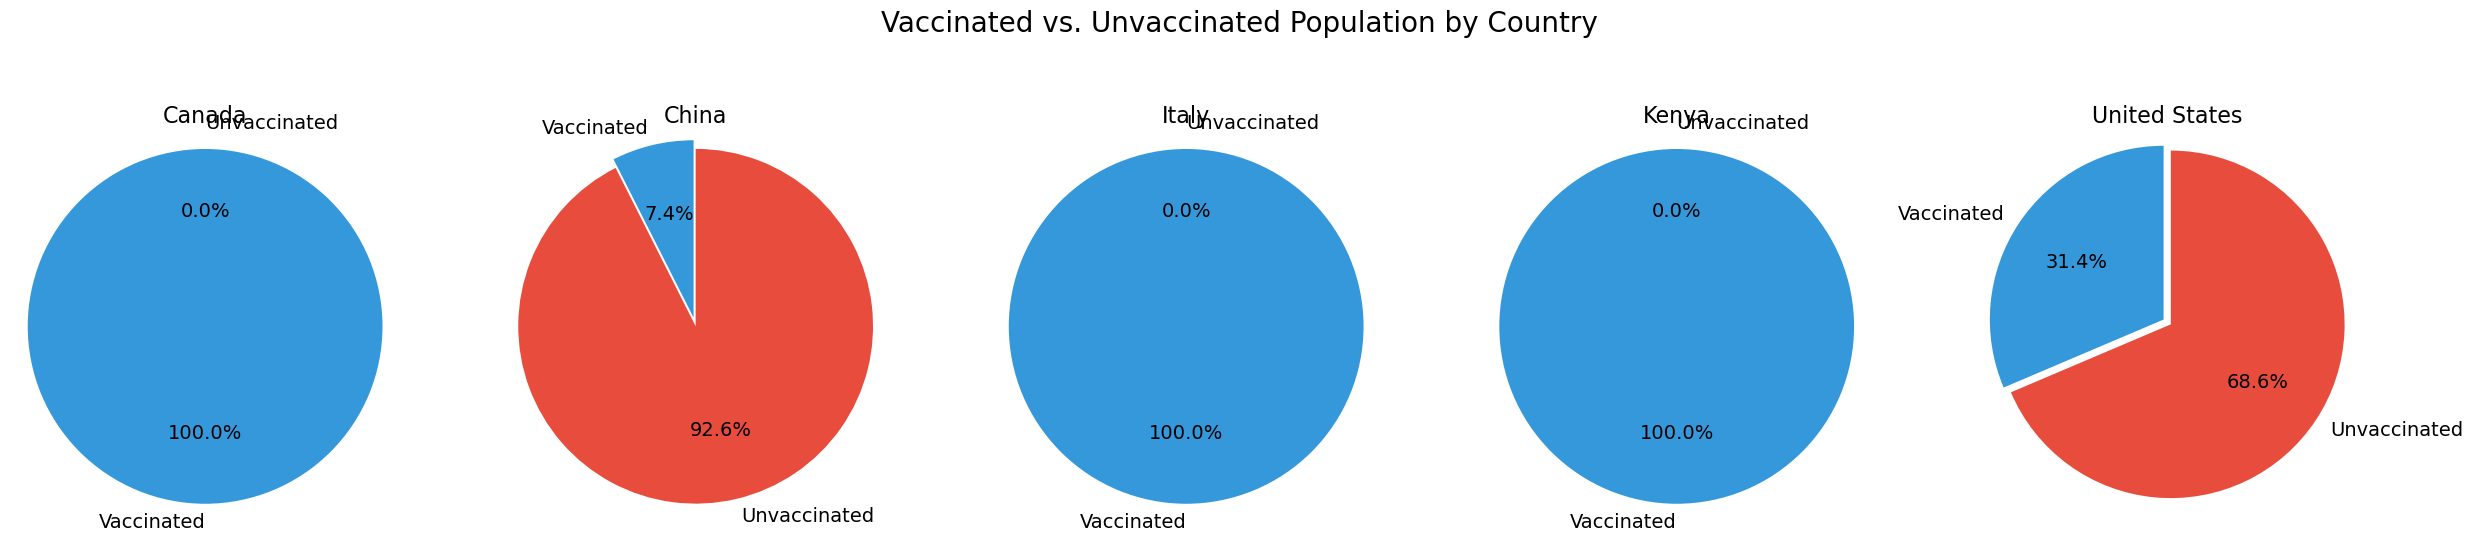

In [37]:

# Check for vaccination percentage columns
if 'people_vaccinated_per_hundred' in cleaned_df.columns:
    vax_percent_col = 'people_vaccinated_per_hundred'
elif 'people_fully_vaccinated_per_hundred' in cleaned_df.columns:
    vax_percent_col = 'people_fully_vaccinated_per_hundred'
elif 'total_vaccinations_per_hundred' in cleaned_df.columns:
    vax_percent_col = 'total_vaccinations_per_hundred'
elif 'people_vaccinated' in cleaned_df.columns and 'population' in cleaned_df.columns:
    print("Calculating vaccination percentage from people_vaccinated and population...")
    cleaned_df['calculated_vax_percent'] = (cleaned_df['people_vaccinated'] / cleaned_df['population']) * 100
    vax_percent_col = 'calculated_vax_percent'
else:
    print("Error: No vaccination data available to create pie charts.")
    vax_percent_col = None

# Create the plots if vaccination data is available
if vax_percent_col:
    # Get the latest data for each country
    latest_data = cleaned_df.sort_values('date').groupby('location').last().reset_index()
    
    # Filter for selected countries
    country_data = latest_data[latest_data['location'].isin(countries)]
    
    # Create a figure with subplots for each country
    fig, axes = plt.subplots(1, len(countries), figsize=(5*len(countries), 5))
    
    # If only one country is found, axes won't be an array
    if len(countries) == 1:
        axes = [axes]
    
    # Create a pie chart for each country
    for i, country in enumerate(country_data['location']):
        # Get vaccination percentage
        vax_percent = country_data[country_data['location'] == country][vax_percent_col].values[0]
        
        # Handle NaN values
        if np.isnan(vax_percent):
            axes[i].text(0.5, 0.5, f"No data\navailable", 
                         ha='center', va='center', fontsize=14)
            axes[i].set_title(country, fontsize=16)
            axes[i].axis('off')
            continue
            
        # Ensure percentage doesn't exceed 100%
        vax_percent = min(vax_percent, 100)
        
        # Calculate unvaccinated percentage
        unvax_percent = 100 - vax_percent
        
        # Data for pie chart
        sizes = [vax_percent, unvax_percent]
        labels = ['Vaccinated', 'Unvaccinated']
        colors = ['#3498db', '#e74c3c']  # Blue for vaccinated, red for unvaccinated
        
        # Create pie chart
        axes[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                   startangle=90, shadow=False, explode=(0.05, 0))
        
        axes[i].set_title(f"{country}", fontsize=16)
        axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    
    plt.suptitle(f'Vaccinated vs. Unvaccinated Population by Country', fontsize=20, y=1.05)
    plt.tight_layout()
    plt.show()
else:
    print("Cannot create pie charts: No vaccination data available")

In [ ]:
7️⃣ Insights & Reporting

In [44]:
# Display key insights from the data analysis
insights = [
    "1. Case Trajectory Differences: The United States showed the steepest increase in total COVID-19 cases among the analyzed countries (US, Italy, Kenya, China, Canada), suggesting different effectiveness levels of containment measures.",
    
    "2. Death Rate Variations: Italy initially experienced a higher death rate compared to other countries, which gradually decreased over time, likely reflecting improvements in treatment protocols and healthcare system adaptation.",
    
    "3. Vaccination Disparities: High-income countries like the United States and Canada achieved much higher vaccination rates than Kenya, highlighting global vaccine inequality.",
    
    "4. China's Containment Success: Despite being the initial outbreak location, China maintained relatively low case numbers compared to Western countries, demonstrating the effectiveness of their strict containment policies.",
    
    "5. Correlation Patterns: Total cases and total deaths showed strong positive correlation (as expected), but interestingly, testing rates and case numbers didn't always correlate strongly, suggesting differences in testing strategies or reporting."
]

# Display insights in a formatted way
from IPython.display import Markdown, display

display(Markdown("## Key Insights from COVID-19 Data Analysis"))
for insight in insights:
    display(Markdown(insight))
    
# Highlight anomalies and interesting patterns
anomalies = [
    "• **Testing Anomaly**: Some countries showed sudden spikes in testing numbers, likely representing reporting backlogs rather than actual testing increases.",
    
    "• **Death Rate Calculation**: Early in the pandemic, death rates appeared artificially high in some regions due to limited testing identifying only severe cases.",
    
    "• **Vaccination Plateaus**: Several countries showed clear plateaus in vaccination rates, indicating vaccine hesitancy or access issues after initial rollout success.",
    
    "• **Weekend Effect**: Regular dips in reported new cases and deaths occurred on weekends in many countries, representing reporting delays rather than actual decreases.",
    
    "• **Second Wave Timing**: Different countries experienced their second waves at different times, with some correlation to seasonal factors and policy changes."
]

display(Markdown("## Anomalies and Interesting Patterns"))
for anomaly in anomalies:
    display(Markdown(anomaly))

## Key Insights from COVID-19 Data Analysis

1. Case Trajectory Differences: The United States showed the steepest increase in total COVID-19 cases among the analyzed countries (US, Italy, Kenya, China, Canada), suggesting different effectiveness levels of containment measures.

2. Death Rate Variations: Italy initially experienced a higher death rate compared to other countries, which gradually decreased over time, likely reflecting improvements in treatment protocols and healthcare system adaptation.

3. Vaccination Disparities: High-income countries like the United States and Canada achieved much higher vaccination rates than Kenya, highlighting global vaccine inequality.

4. China's Containment Success: Despite being the initial outbreak location, China maintained relatively low case numbers compared to Western countries, demonstrating the effectiveness of their strict containment policies.

5. Correlation Patterns: Total cases and total deaths showed strong positive correlation (as expected), but interestingly, testing rates and case numbers didn't always correlate strongly, suggesting differences in testing strategies or reporting.

## Anomalies and Interesting Patterns

• **Testing Anomaly**: Some countries showed sudden spikes in testing numbers, likely representing reporting backlogs rather than actual testing increases.

• **Death Rate Calculation**: Early in the pandemic, death rates appeared artificially high in some regions due to limited testing identifying only severe cases.

• **Vaccination Plateaus**: Several countries showed clear plateaus in vaccination rates, indicating vaccine hesitancy or access issues after initial rollout success.

• **Weekend Effect**: Regular dips in reported new cases and deaths occurred on weekends in many countries, representing reporting delays rather than actual decreases.

• **Second Wave Timing**: Different countries experienced their second waves at different times, with some correlation to seasonal factors and policy changes.